In [ ]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
#import csv files 
city_data_to_load = "resources/city_data.csv"
ride_data_to_load = "resources/ride_data.csv"

In [ ]:
#read data into dataframes
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

In [ ]:
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

In [ ]:
#get columns and rows that are not null 
city_data_df.count()

In [ ]:
#double check for null values
city_data_df.isnull().sum()

In [ ]:
#get data types
city_data_df.dtypes

In [ ]:
#get unique city types from dataframe
city_data_df["type"].unique()

In [ ]:
#same thing for ride data
ride_data_df.count()

In [ ]:
ride_data_df.isnull().sum()

In [ ]:
ride_data_df.dtypes

In [ ]:
#merge the two data frames. both DF's have city column in common. add cityDF to end of rideDF
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city","city"])

In [ ]:
#create dataframes for each city type
urban_cities_df = pyber_data_df[pyber_data_df["type"]=="Urban"]
suburban_cities_df = pyber_data_df[pyber_data_df["type"]=="Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"]=="Rural"]

In [ ]:
#use groupby to create series that contain number of riders for each city type 
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]

In [ ]:
#get average fare for each city
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]

In [ ]:
#get average number of drivers for each city 
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]

In [ ]:
# Build the scatter plots for urban cities.
plt.scatter(urban_ride_count, urban_avg_fare, s=10*urban_driver_count, color="coral", edgecolors="black", alpha=.8, linewidths=1, label="Urban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.legend()
plt.xlabel("Total Number of Rides Per City (2019)")
plt.ylabel("Average Fare ($)")
plt.grid(True)

In [ ]:
# Build the scatter plots for suburban cities.
plt.scatter(suburban_ride_count, suburban_avg_fare, s=10*suburban_driver_count, color="skyblue", edgecolors="black", alpha=.8, linewidths=1, label="Suburban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.legend()
plt.xlabel("Total Number of Rides Per City (2019)")
plt.ylabel("Average Fare ($)")
plt.grid(True)

In [ ]:
# Build the scatter plots for rural cities.
plt.scatter(rural_ride_count, rural_avg_fare, s=10*rural_driver_count, color="gold", edgecolors="black", alpha=.8, linewidths=1, label="Rural")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.legend()
plt.xlabel("Total Number of Rides Per City (2019)")
plt.ylabel("Average Fare ($)")
plt.grid(True)

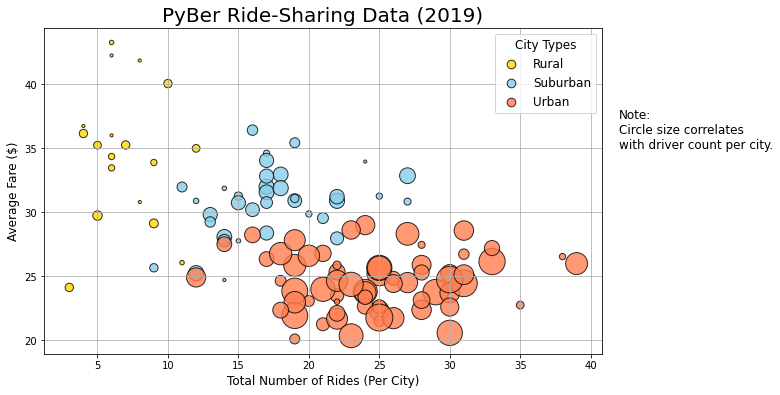

In [55]:
#create one scatter chart with the 3 city type scatter charts
plt.subplots(figsize=(10,6))
#rural
plt.scatter(rural_ride_count, rural_avg_fare, s=10*rural_driver_count, color="gold", edgecolors="black", alpha=.8, linewidths=1, label="Rural")
#suburban
plt.scatter(suburban_ride_count, suburban_avg_fare, s=10*suburban_driver_count, color="skyblue", edgecolors="black", alpha=.8, linewidths=1, label="Suburban")
#urban
plt.scatter(urban_ride_count, urban_avg_fare, s=10*urban_driver_count, color="coral", edgecolors="black", alpha=.8, linewidths=1, label="Urban")
#add things to the scatter chart
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid(True)
plt.legend()

#fix legend size and add other parameters for font size
lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)
# Incorporate a text label about circle size.
plt.text(42, 35, "Note:\nCircle size correlates\nwith driver count per city.", fontsize="12")
# Save the figure.
plt.savefig("analysis/Fig1.png")
plt.show()